# 1. | Importing Libraries

In [1]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve

# 2. | Read Dataset

In [2]:
df = pd.read_csv("adm_data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [4]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

In [5]:
df.isnull().sum()

SerialNo.           0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         500 non-null    int64  
 1   GREScore          500 non-null    int64  
 2   TOEFLScore        500 non-null    int64  
 3   UniversityRating  500 non-null    int64  
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    int64  
 8   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
data = []
rate = df["ChanceofAdmit"].values
for x in rate:
  if (x >= 0.01 and x < 0.5):    
    data.append("low")
  elif (x >= 0.5 and x <= 0.8):
    data.append("medium")
  elif (x > 0.8 and x <= 1.0):
    data.append("high")

In [9]:
df['category'] = data
df

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,category
0,1,337,118,4,4.5,4.5,9.65,1,0.92,high
1,2,324,107,4,4.0,4.5,8.87,1,0.76,medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,medium
3,4,322,110,3,3.5,2.5,8.67,1,0.80,medium
4,5,314,103,2,2.0,3.0,8.21,0,0.65,medium
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,high
496,497,337,117,5,5.0,5.0,9.87,1,0.96,high
497,498,330,120,5,4.5,5.0,9.56,1,0.93,high
498,499,312,103,4,4.0,5.0,8.43,0,0.73,medium


In [10]:
df1 = df.copy()
del df['SerialNo.']

# 3. | Data Exploration

In [11]:
corr = df.corr()

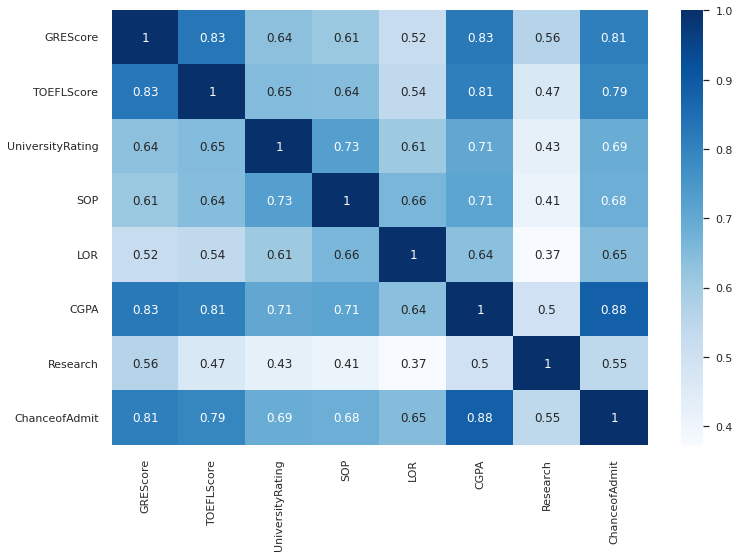

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr, annot = True, cmap = 'Blues')

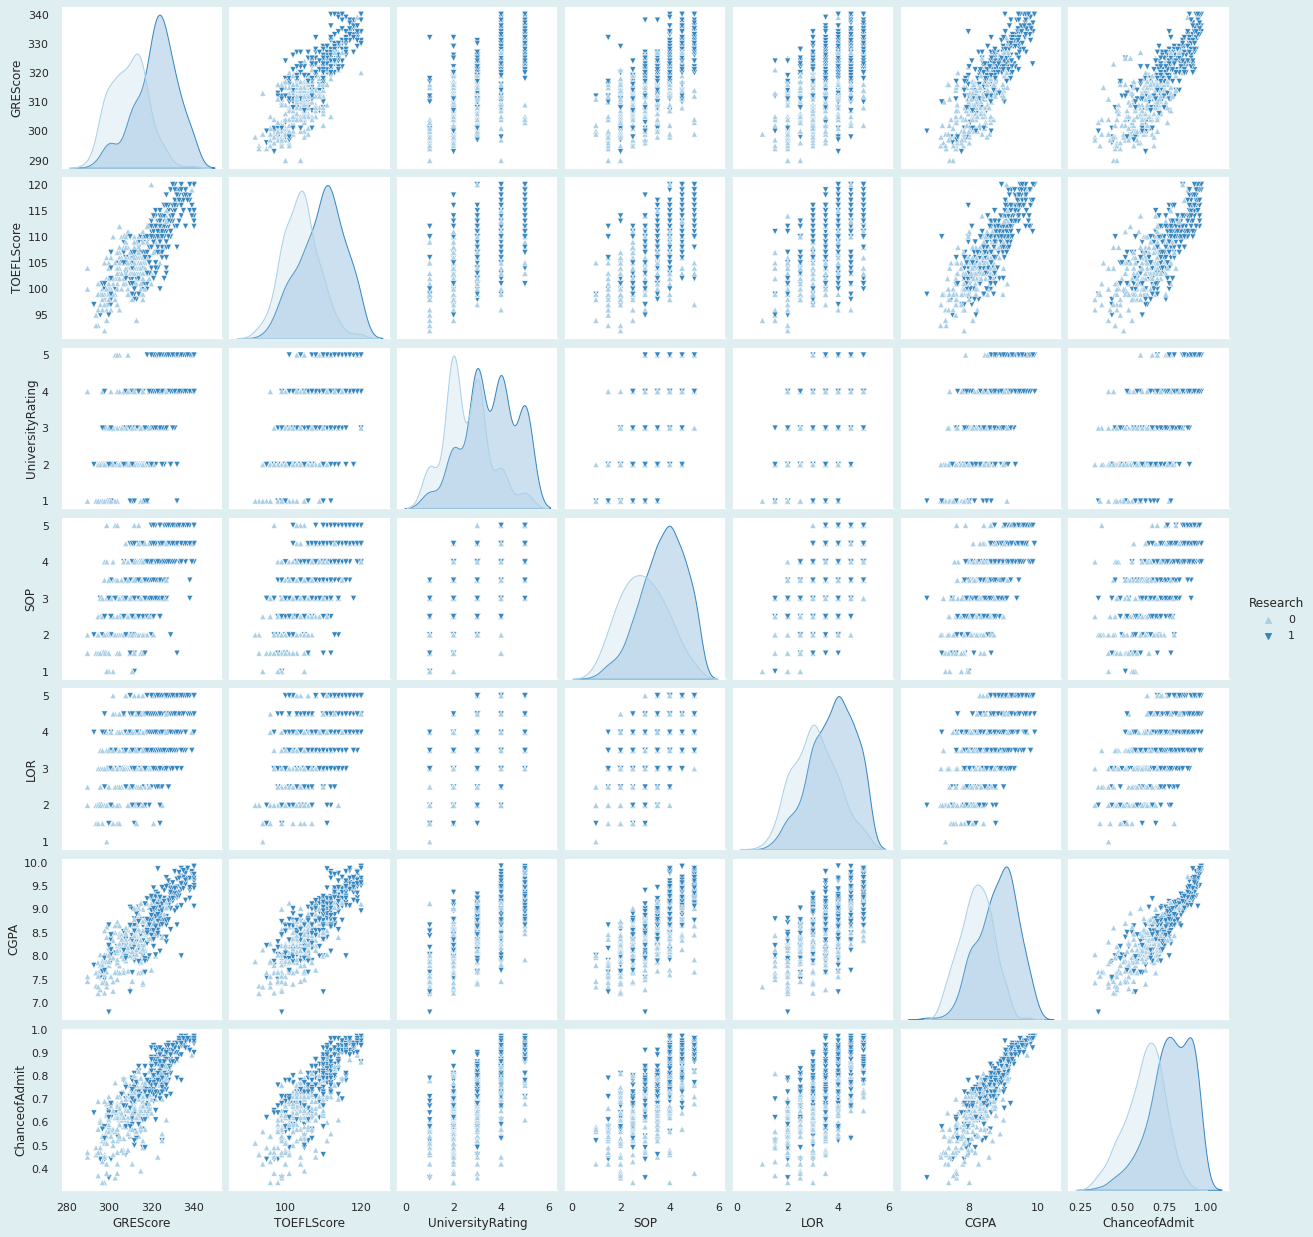

In [13]:
# Map to upper,lower and diagonal
plt.rcParams['axes.facecolor'] = "#FFFFFF"
plt.rcParams['figure.facecolor'] = "#dfeef1"
g = sns.pairplot(data=df,hue='Research',markers=["^", "v"],palette='Blues')

*************************
.: Category Total :.
*************************


medium    321
high      142
low        37
Name: category, dtype: int64

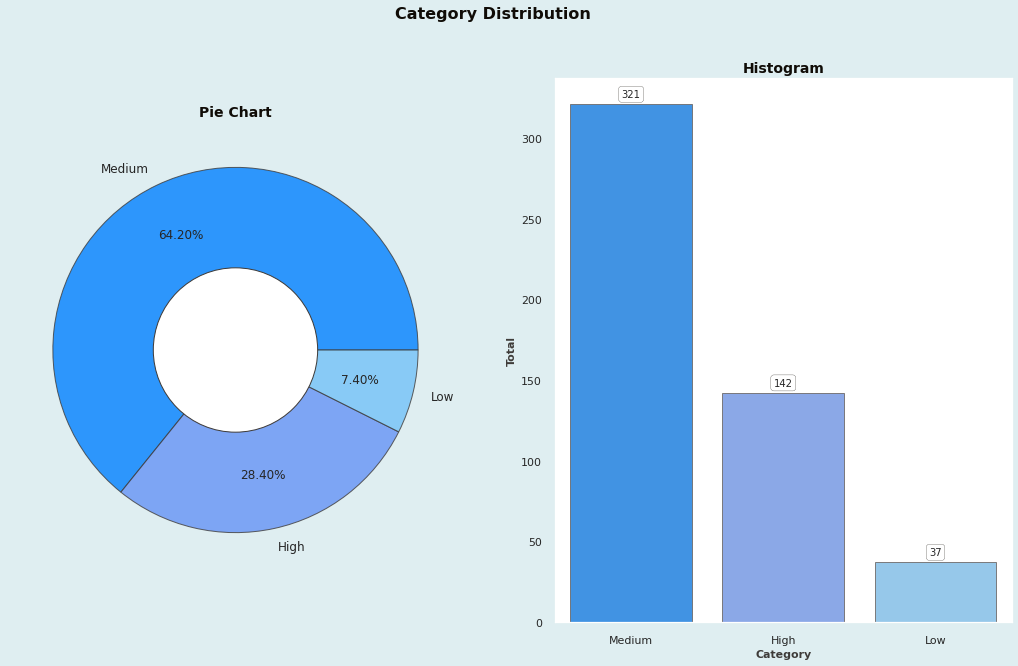

In [14]:
# --- Create List of Color Palletes ---
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
blue_grad = ['#0080FF', '#6593F5', '#73C2F8', '#66D7EB', '#111E6C']
# --- Setting Colors, Labels, Order ---
colors=blue_grad[0:3]
labels=['Medium', 'High', 'Low']
order=df['category'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))
plt.suptitle('Category Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['category'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='category', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Category', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Category Total :.'+'\033[0m')
print('*' * 25)
df.category.value_counts(dropna=False)

.: GRE Score Column Skewness & Kurtosis :.
****************************************
Skewness: -0.040
Kurtosis: -0.711




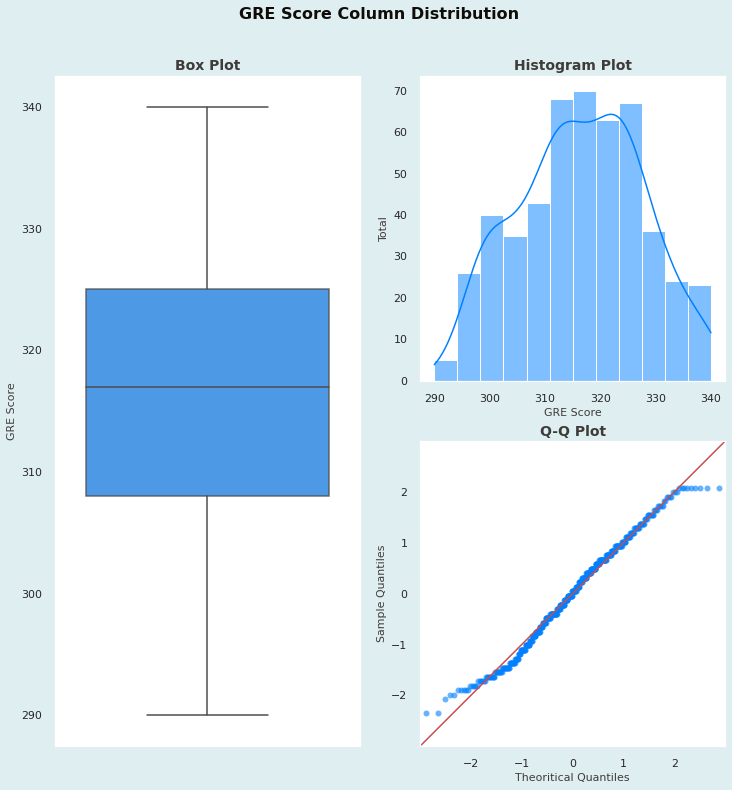

In [15]:
# --- Variable, Color & Plot Size ---
var = 'GREScore'
color = '#0080FF'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: GRE Score Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('GRE Score Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('GRE Score', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('GRE Score', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

.: TOEFL Score Column Skewness & Kurtosis :.
****************************************
Skewness: 0.096
Kurtosis: -0.653




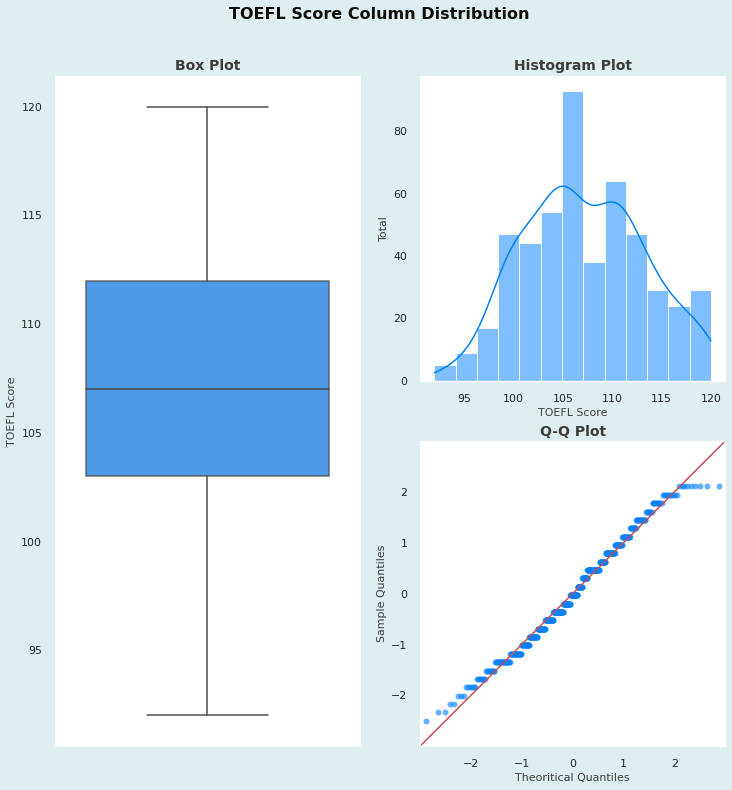

In [16]:
# --- Variable, Color & Plot Size ---
var = 'TOEFLScore'
color = '#0080FF'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: TOEFL Score Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('TOEFL Score Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('TOEFL Score', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('TOEFL Score', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

In [17]:
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['CGPA'],
                    y = df['ChanceofAdmit'],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['GREScore'], showscale = True),
                    text = df['GREScore']
                    )



layout = dict(title = 'GRE is Highlighted',
              yaxis= dict(title= 'ChanceofAdmit',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'CGPA',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [18]:
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['CGPA'],
                    y = df['ChanceofAdmit'],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['SOP'], showscale = True),
                    text = df['SOP']
                    )



layout = dict(title = 'With SOP',
              yaxis= dict(title= 'ChanceofAdmit',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'CGPA',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [19]:
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['CGPA'],
                    y = df['ChanceofAdmit'],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['UniversityRating'], showscale = True),
                    text = df['UniversityRating']
                    )



layout = dict(title = 'With University Rating',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'CGPA',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [20]:
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['CGPA'],
                    y = df['ChanceofAdmit'],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['Research'], showscale = True),
                    text = df['Research']
                    )



layout = dict(title = 'With Research',
              yaxis= dict(title= 'ChanceofAdmit',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'CGPA',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [21]:
query1 = df[df['ChanceofAdmit']>0.75]
query1

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,category
0,337,118,4,4.5,4.5,9.65,1,0.92,high
1,324,107,4,4.0,4.5,8.87,1,0.76,medium
3,322,110,3,3.5,2.5,8.67,1,0.80,medium
5,330,115,5,4.5,3.0,9.34,1,0.90,high
11,327,111,4,4.0,4.5,9.00,1,0.84,high
...,...,...,...,...,...,...,...,...,...
488,322,112,3,3.0,4.0,8.62,1,0.76,medium
495,332,108,5,4.5,4.0,9.02,1,0.87,high
496,337,117,5,5.0,5.0,9.87,1,0.96,high
497,330,120,5,4.5,5.0,9.56,1,0.93,high


In [22]:
color=['Orange', 'Yellow', 'Green', 'Blue', 'Purple', 'Violet', 'Pink']
cols = ['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']
cols1 = ['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research', 'ChanceofAdmit']

In [23]:
x=0
for i in cols:
    plot_data = [
        go.Scatter(
            x=df[i],
            y=df['ChanceofAdmit'],
            mode = "markers",
            name=i,
            marker = dict(color = color[x])

            ),
        go.Scatter(
            x=query1[i],
            y=query1['ChanceofAdmit'],
            mode = "markers",
            name='> 75% Chance',
            marker = dict(color = 'Red')

            ),

    ]
    plot_layout = go.Layout(
            #title=i,
            yaxis_title='ChanceofAdmit',
            xaxis_title=i
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)
    x+=1

# 4. | Preprocessing Data

In [24]:
df['category'].replace(['high', 'medium', 'low'],
                        [3, 2, 1], inplace=True)
df['category'] = df['category'].astype("int")
df['category']

0      3
1      2
2      2
3      2
4      2
      ..
495    3
496    3
497    3
498    2
499    3
Name: category, Length: 500, dtype: int64

In [25]:
df.corr(method='pearson')

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,category
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,0.706564
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,0.719046
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,0.634437
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,0.595776
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,0.562492
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,0.782905
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,0.483263
ChanceofAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,0.869582
category,0.706564,0.719046,0.634437,0.595776,0.562492,0.782905,0.483263,0.869582,1.000000


In [26]:
x = df.iloc[:, :-2].values
y = df.iloc[:, -1]

In [27]:
x_reg = df.iloc[:, :-2].values
y_reg = df.iloc[:, -2]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=7)

In [29]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=7)

# 5. | Modelling

In [65]:
# **Mencari nilai K terbaik berdasarkan nilai error rate terendah untuk dimasukkan kedalam model KNN**
err_rates = []
for idx in range(1,31):
 knn = KNeighborsClassifier(n_neighbors = idx)
 knn.fit(x1_train, y1_train)
 pred_idx = knn.predict(x1_test)
 err_rates.append(np.mean(y1_test != pred_idx))

Text(0.5, 1.0, 'Error Rate vs K-value')

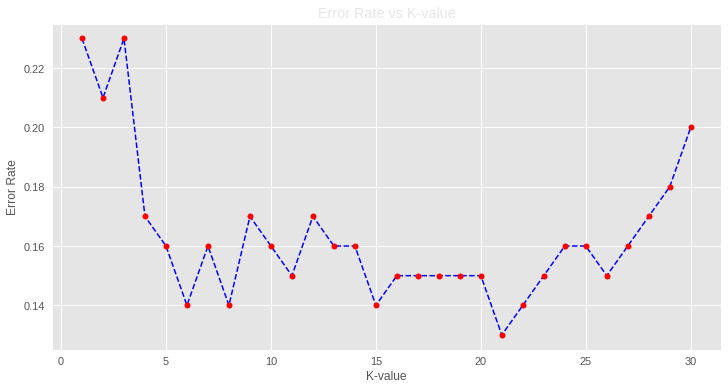

In [66]:
plt.style.use('ggplot')
plt.subplots(figsize = (12,6))
plt.plot(range(1,31), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

In [67]:
knn = KNeighborsClassifier(n_neighbors=21) 
model3 = knn.fit(x1_train, y1_train)

In [68]:
y_pred_KNN = model3.predict(x1_test)

In [96]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import mplcyberpunk
plt.style.use("cyberpunk")

.:. K-Nearest Neighbour Accuracy: 87.00% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           1       0.67      0.33      0.44         6
           2       0.90      0.91      0.91        69
           3       0.81      0.88      0.85        25

    accuracy                           0.87       100
   macro avg       0.79      0.71      0.73       100
weighted avg       0.86      0.87      0.86       100


.: Performance Evaluation
**************************


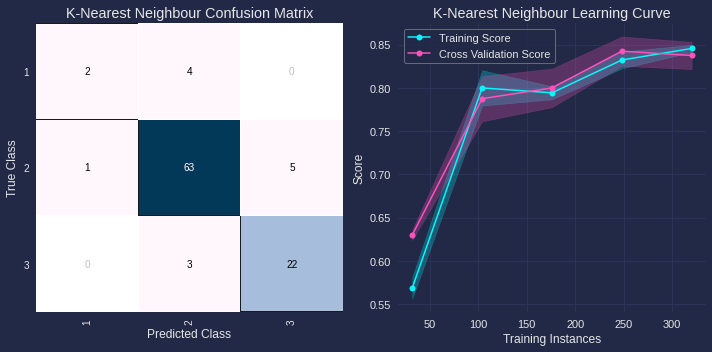

In [98]:
KNNAcc = accuracy_score(y_pred_KNN, y1_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y1_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(model3, ax=ax1, cmap='PuBu',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x1_train, y1_train)
knnmatrix.score(x1_test, y1_test)
knnmatrix.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(model3, ax=ax2, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x1_train, y1_train)
knnlc.finalize()

plt.tight_layout();

In [99]:
joblib.dump((model3), "model_KNNCls.model")

['model_KNNCls.model']

In [100]:
rf = RandomForestClassifier(n_estimators=40, max_leaf_nodes=5, min_samples_split=25)
model4 = rf.fit(x1_train, y1_train)

In [101]:
y_pred_RF = model4.predict(x1_test)

.:. Random Forest Accuracy: 88.00% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.89      0.94      0.92        69
           3       0.85      0.92      0.88        25

    accuracy                           0.88       100
   macro avg       0.58      0.62      0.60       100
weighted avg       0.83      0.88      0.85       100


.: Performance Evaluation
**************************


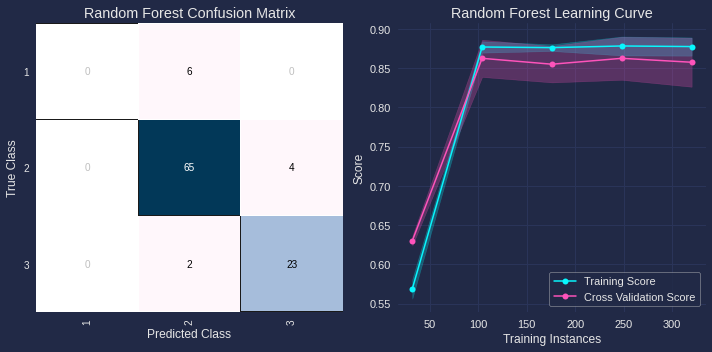

In [102]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y1_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y1_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(model4, ax=ax1, cmap='PuBu',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x1_train, y1_train)
rfcmatrix.score(x1_test, y1_test)
rfcmatrix.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(model4, ax=ax2, title='Random Forest Learning Curve')
rcclc.fit(x1_train, y1_train)
rcclc.finalize()

plt.tight_layout();

In [103]:
joblib.dump((model4), "model_RFCls.model")

['model_RFCls.model']

# Regresi

In [104]:
# Fitting Multiple Linear Regression
regressor = LinearRegression() 
model = regressor.fit(x_train, y_train)

In [105]:
# Predicting the results
y_predict = model.predict(x_test)

In [106]:
mean_squared_error(y_test, y_predict)

0.003141383164422372

In [107]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predict)
r2 = '{:.4}'.format(r2*100)
print(f'{r2}%')

83.15%


In [108]:
joblib.dump((regressor), "model_Reg.model")

['model_Reg.model']

In [109]:
from sklearn.metrics import mean_squared_error
est = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.2239, n_estimators=28, min_samples_split=45)
model2 = est.fit(x_train, y_train)

In [110]:
ypredict2 = model2.predict(x_test)

In [111]:
mean_squared_error(y_test, ypredict2)

0.0035120275979317788

In [112]:
r23 = r2_score(y_test,ypredict2)
r23 = '{:.4}'.format(r23*100)
print(f'{r23}%')

81.16%


In [113]:
joblib.dump((est), "model_GBReg.model")

['model_GBReg.model']

# Prediksi

In [114]:
x_test[0]

array([312.  , 108.  ,   3.  ,   3.5 ,   3.  ,   8.53,   0.  ])

In [178]:
from joblib import load

# load model
model = load('model_Reg.model')
model2 = load('model_GBReg.model')
model3 = load('model_KNNCls.model')
model4 = load('model_RFCls.model')

In [330]:
inputan = {'GREScore': [37],
        'TOEFLScore' : [83],
        'UniversityRating': [5],
        'SOP'  : [4.5],
        'LOR'  : [4.5],
        'CGPA'  : [10],
        'Research'  : [0]
        }

In [331]:
df_test = pd.DataFrame(inputan)
df_test = df_test.values
df_test

array([[37. , 83. ,  5. ,  4.5,  4.5, 10. ,  0. ]])

In [332]:
pred_test = model.predict(df_test[0:1])
pred_test
print(f"{np.round(pred_test[0] * 100,2)} %")

33.51 %


In [333]:
pred_test1 = model2.predict(df_test[0:1])
pred_test1
print(f"{np.round(pred_test1[0] * 100,2)} %")

87.02 %


In [334]:
pred_test2 = model3.predict(df_test[0:1])
pred_test2[0]

1

In [335]:
pred_test3 = model4.predict(df_test[0:1])
pred_test3[0]

2

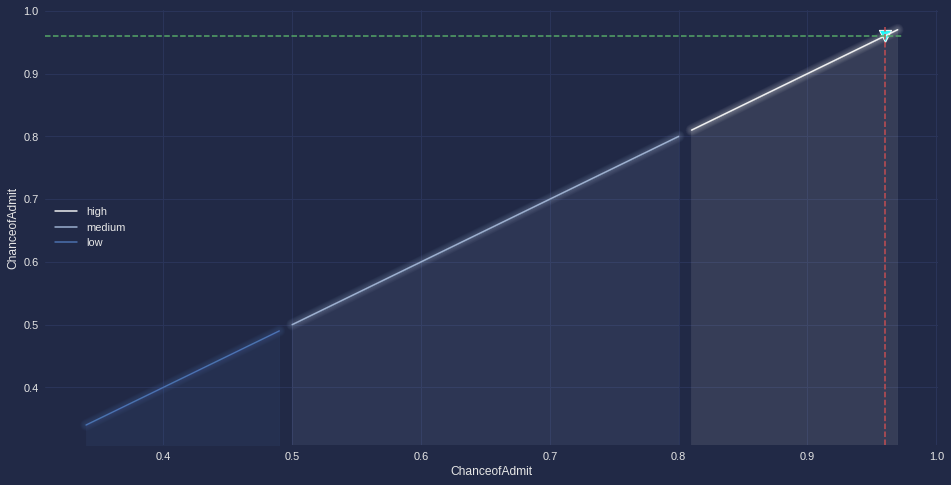

In [316]:
from seaborn.relational import lineplot
plt.figure(figsize = (16,8))
sns.lineplot(data=df1, x='ChanceofAdmit', y='ChanceofAdmit', hue='category', palette='light:b')
sns.scatterplot(pred_test[0:1], pred_test[0:1], s=150, color='cyan', marker='v')
mplcyberpunk.add_glow_effects()
plt.axvline(x=pred_test[0:1], color='r', linestyle='--', ymax=pred_test[0:1])
plt.axhline(y=pred_test[0:1], color='g', linestyle='--', xmax=pred_test[0:1])

plt.savefig("eval.png")

In [122]:
pred_test2 = model.predict(df_test[0:1])
pred_test2[0:1]


array([0.90571919])

for x in rate:
  if (x >= 0.01 and x < 0.5):    
    data.append("low")
  elif (x >= 0.5 and x <= 0.8):
    data.append("medium")
  elif (x > 0.8 and x <= 1.0):
    data.append("high")

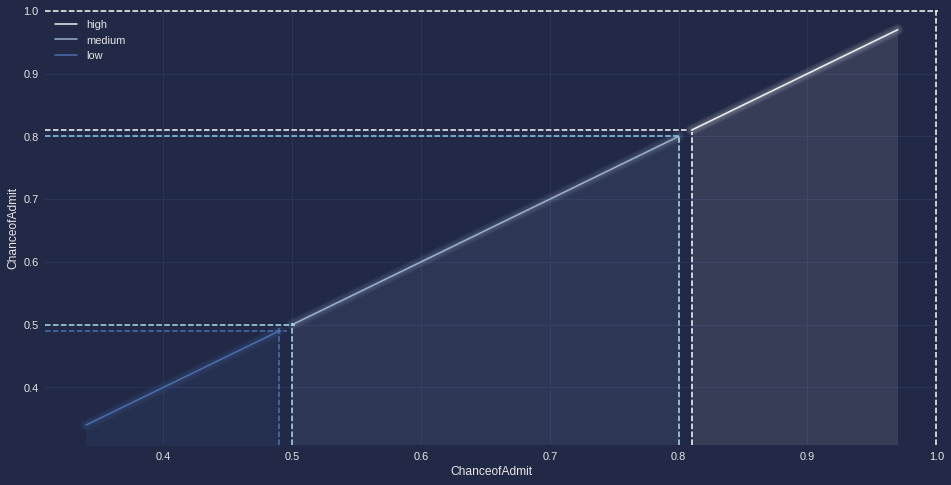

In [123]:
from seaborn.relational import lineplot
plt.figure(figsize = (16,8))
sns.lineplot(data=df1, x='ChanceofAdmit', y='ChanceofAdmit', hue='category', palette='light:b')
sns.scatterplot(pred_test2[0:1], s=150, color='cyan', marker='v')
mplcyberpunk.add_glow_effects()
plt.axvline(x=(1.0), color='w', linestyle='--', ymax=(1.0))
plt.axhline(y=(1.0), color='w', linestyle='--', xmax=(1.0))
plt.axvline(x=(0.81), color='w', linestyle='--', ymax=(0.72))
plt.axhline(y=(0.81), color='w', linestyle='--', xmax=(0.72))

plt.axvline(x=(0.5), color='powderblue', linestyle='--', ymax=(0.28))
plt.axhline(y=(0.5), color='powderblue', linestyle='--', xmax=(0.28))
plt.axvline(x=(0.8), color='powderblue', linestyle='--', ymax=(0.71))
plt.axhline(y=(0.8), color='skyblue', linestyle='--', xmax=(0.71))

plt.axvline(x=(0.0), color='r', linestyle='--', ymax=(0.0))
plt.axhline(y=(0.0), color='g', linestyle='--', xmax=(0.0))
plt.axvline(x=(0.49), color='b', linestyle='--', ymax=(0.27))
plt.axhline(y=(0.49), color='b', linestyle='--', xmax=(0.27))

plt.savefig("eval.png")